<a href="https://colab.research.google.com/github/juanBRmecatronica/curso_IA/blob/main/taller%20l%C3%B3gica%20fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [52]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [53]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Diseñar un control proporcional para una entrada (error) y una salida(acción de control)

**Variable de entrada (input)- Antecedente**

error
*   ¿Qué tan grande es el error?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-100,100] %

**Variable de salida (output)- Consecuencia**

control
*   La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-12,12] %

**Reglas**

1.   **SI** El error es *negativo* **ENTONCES** La acción de control es *negativa*
2.   **SI** El error es *cero* **ENTONCES** La acción de control es *cero*
3.   **SI** El error es *positivo* **ENTONCES** La acción de control es *positivo*





### **PASO 1. Variable de entrada**

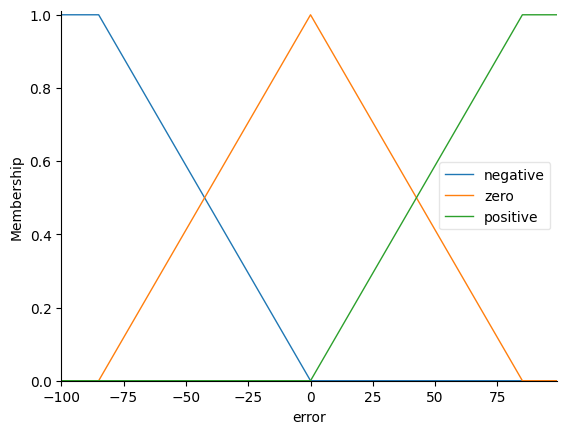

In [91]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-85,0])
error['zero'] = fuzz.trimf(error.universe,[-85,0,85])
error['positive'] = fuzz.trapmf(error.universe,[0,85,100,100])
error.view()

### exepciones

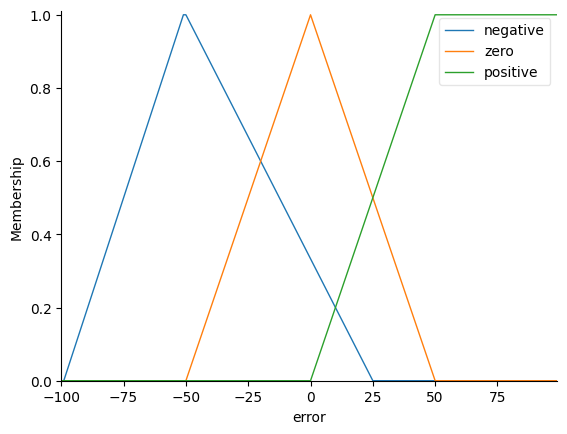

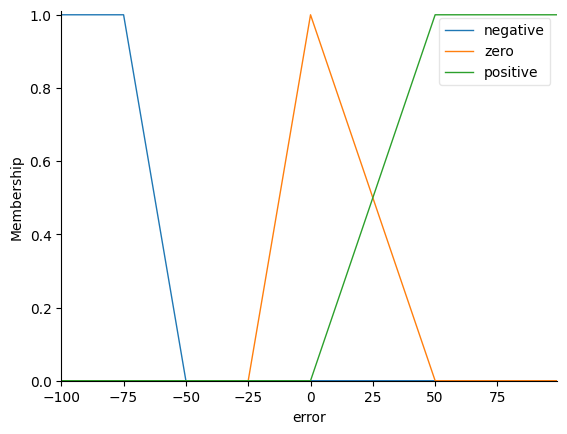

este tipo de asignaciones son invalidas debido a que existen pundos donde no existe una pertenencia a ningun conjunto de terminos, algo así como una indeterminación, algo que la logica fuzzy no soporta.


una forma de hacer algo parecido seria mediante las condiciones de pertenencia, defininedo una funcion en la cual al momnto de llegar, por ejemplo , al valor comprendido entre -50 y -25.

las indeterminaciones se ven, en la primera imagen en el punto"-100". en la segunda imagen se ve en en el tramo de -50 a -25.

### **PASO 2. Variable de salida**

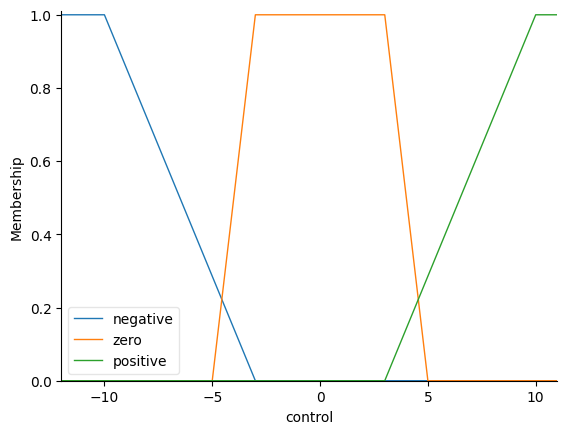

In [109]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,-3])
control['zero'] = fuzz.trapmf(control.universe,[-5,-3,3,5])
control['positive'] = fuzz.trapmf(control.universe,[3,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [110]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [111]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 2.982085067479878
Salida defuzzificada  redondeada= 2.98


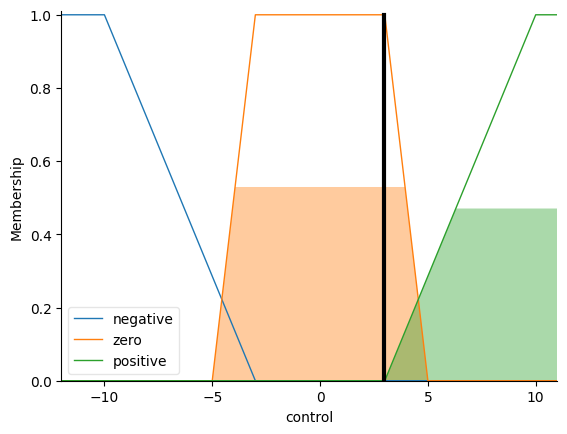

In [112]:
control_sim.input['error'] = 40
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [113]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [114]:
for i in range (n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i]  = control_sim.output['control']

In [115]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acción de control [V]')

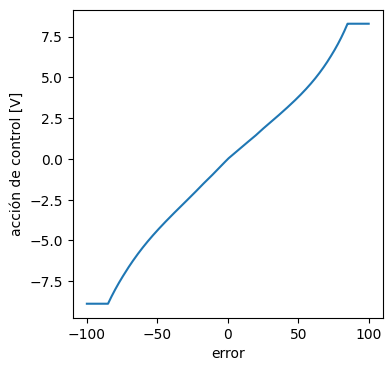

In [116]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

comparar con la grafica original

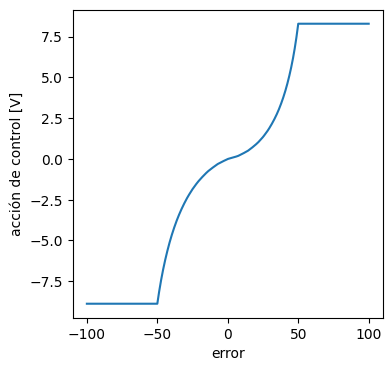

grfica de control en la cual se redujo la regino de pertenecia del termino "cero" de la entrada (error) lo maximo posible.

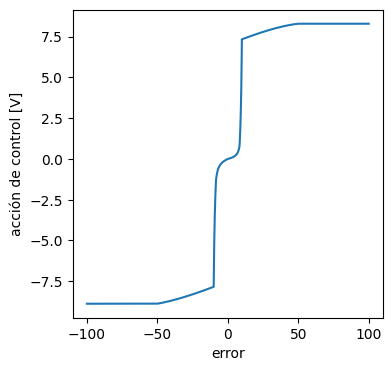

grfica de control en la cual se redujo la regino de pertenecia del termino "cero" de la entrada (error) y la salida(axion de control) lo maximo posible.


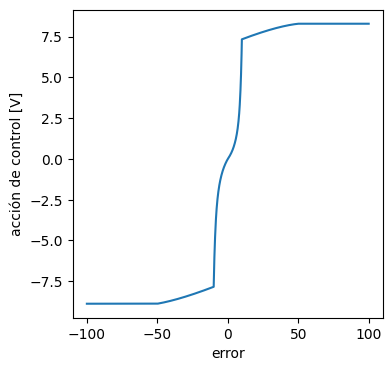



con las anteriores nos damos cuenta que para lograr un control proporcional sería mejor aumentar las regiones donde se solapan los terminos

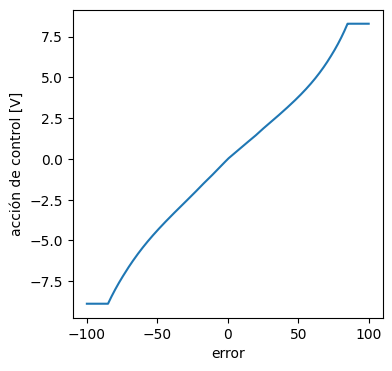